## Food Price
This notebook consists of the wrangling involved in `Food Price`

The steps are as follows:
 1. Loading and renaming the dataset
 2. Aggregating the columns
 3. Reshaping the dataframe into common structure
 4. Export into csv

In [1]:
#Loading the required libraries:
library (tidyverse)
library(lubridate)  
library(stringr)
library(ggplot2)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




### Loading and renaming the dataset

In [2]:
#Loading the file and wrangling it 

base_csv <- read_csv("food-price-index-sept19-index-numbers.csv",
                col_types = cols(Period = col_character()))

unclean_df <- base_csv %>% filter(Series_title_1 == "Restaurant meals and ready-to-eat food") %>%  select(c(2,3,8))

unclean_df <- rename(unclean_df, Date = Period, Avg_Meal_Price = Data_value,Category = Series_title_1)

unclean_df %>% glimpse

Observations: 244
Variables: 3
$ Date           <chr> "1999.06", "1999.07", "1999.08", "1999.09", "1999.1"...
$ Avg_Meal_Price <dbl> 616.3569, 617.1004, 617.1004, 619.3309, 620.0743, 62...
$ Category       <chr> "Restaurant meals and ready-to-eat food", "Restauran...


### Aggregating the columns

In [3]:
#creating a function to parse date and aggregate columns

add_ymq <- function(df){
            df %>%
                mutate(Year = year(df$Date), 
                       Month = month(df$Date),
                       Quarter = zoo::as.yearqtr(df$Date, format = "%Y-%m-%d")) %>%
                select(-c("Date")) %>%  #removing the "Date" column
                select(c(3,4,5,1,2))  #selecting the column in the required order
    }

# Adding dummy date to convert to date format
parse_date <- function(x){
a <- x
a <- gsub("[.][1]$",".10",a$Date)  
a <- paste(a,"-1",sep ="")
a <- gsub("[.]","-",a)
a <- as.Date(a)
    }

wrangle_food <- function(df){
df %>% 
    mutate(Date = parse_date(df)) %>%  
    add_ymq() %>%
    select(c(1:4))
    }

### Reshaping the dataframe into common structure

In [4]:
final <- unclean_df %>% wrangle_food()
final %>% head()

Year,Month,Quarter,Avg_Meal_Price
<dbl>,<dbl>,<yearqtr>,<dbl>
1999,6,1999 Q2,616.3569
1999,7,1999 Q3,617.1004
1999,8,1999 Q3,617.1004
1999,9,1999 Q3,619.3309
1999,10,1999 Q4,620.0743
1999,11,1999 Q4,620.0743


### Export into csv

The below exported file is further used in `section -3 of 'IVS.pynb'` that has IVS data for further analysis.

In [5]:
write_csv(final,"FoodPrice.csv")

### Visualization and Inferences

Lets make some visualization from the final data to analyze further

In [6]:
#creating a dataframe for plotting line chart
vis_FP <- final %>% 
        filter(Year >= 2014) %>% 
        select(Year,Avg_Meal_Price) %>% 
        group_by(Year) %>% 
        summarise( Avg_MealPrice = mean(Avg_Meal_Price))
vis_FP

Year,Avg_MealPrice
<dbl>,<dbl>
2014,944.5477
2015,961.9579
2016,980.2974
2017,1001.4870
2018,1029.6667
2019,1058.1111


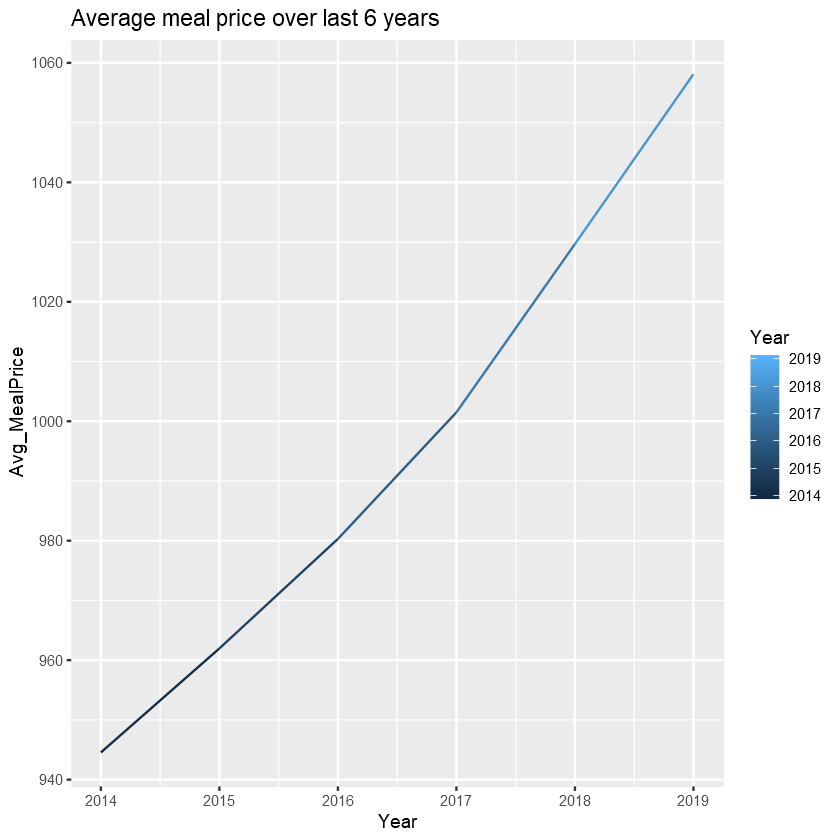

In [7]:
# A line chart that shows the trend of average meal price over the last 6 years
plot1 <- ggplot(vis_FP, aes(x = Year, y = Avg_MealPrice)) 
plot1 + geom_line(aes(color = Year)) +   ggtitle("Average meal price over last 6 years")

#### After executing this notebook, go to <b>`read_me.txt`</b> to execute the next notebook.

If you have `already executed` all the other notebooks, `then` go to `section -3 in 'IVS.pynb'` that has IVS data